In [1]:
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import os

from keras.models import load_model
from tensorflow.keras.preprocessing import image as image_utils
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
dog_dataset = '70-Dog-Breeds-Image-Data-Set'
cur_dir = '/content/gdrive/MyDrive/Capstone-Project/Dataset'
dog_dir = os.path.join(cur_dir, 'Dog-Breeds')
train_dir = os.path.join(dog_dir,'train')

In [4]:
model = load_model('/content/gdrive/MyDrive/Capstone-Project/dog_model.h5')

In [5]:
actual_breeds = []
predicted_breeds = []
breed_names = [labels for labels in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, labels))]
image_files = [os.path.join(root, f)
               for root, dirs, files in os.walk(train_dir)
               for f in files
               if os.path.isfile(os.path.join(root, f))]

In [6]:
def preprocess_image(img_path):
    img = image_utils.load_img(img_path, target_size=(224, 224))
    img_array = image_utils.img_to_array(img)
    img_array /= 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [7]:
def predict_breed(img_array):
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    predicted_score = np.max(prediction)
    similarity = predicted_score * 100

    predicted_breed = breed_names[predicted_class[0]]

    return predicted_breed, similarity

In [8]:
def plot_random_images(image_files):
    num_samples = min(20, len(image_files))
    random_images = random.sample(image_files, num_samples)

    for i, img_path in enumerate(random_images, start=1):
        if i % 5 == 1:
            fig = plt.figure(figsize=(20, 4))

        img_array = preprocess_image(img_path)
        predicted_breed, similarity = predict_breed(img_array)
        actual_breed = os.path.basename(os.path.dirname(img_path))

        actual_breeds.append(actual_breed)
        predicted_breeds.append(predicted_breed)

        ax = fig.add_subplot(1, 5, i % 5 if i % 5 != 0 else 5)
        ax.imshow(np.squeeze(img_array))
        ax.axis('off')

        if predicted_breed == actual_breed:
            color = 'blue'
        else:
            color = 'red'

        ax.set_title(f"Predicted: {predicted_breed} \nSimilarities:{similarity:.2f}% \nActual: {actual_breed}", color=color)

        if i % 5 == 0:
            plt.show()

1/1 [==============================] - 0s 262ms/step


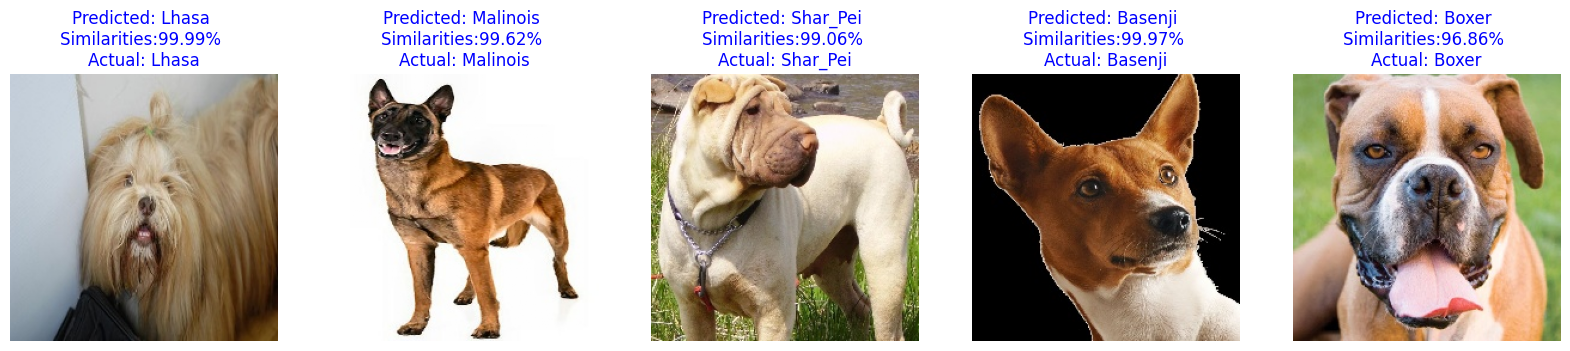

1/1 [==============================] - 0s 289ms/step


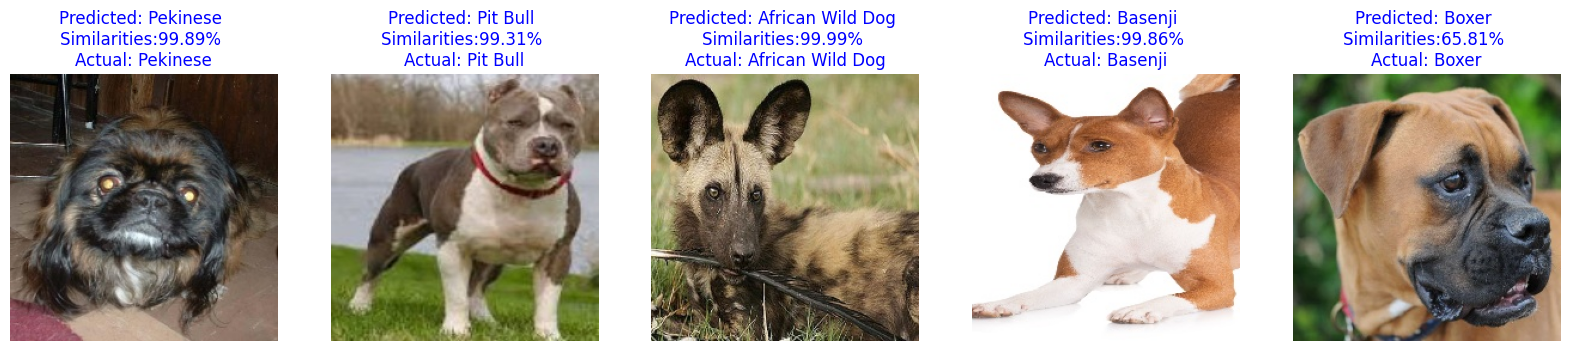

1/1 [==============================] - 0s 147ms/step


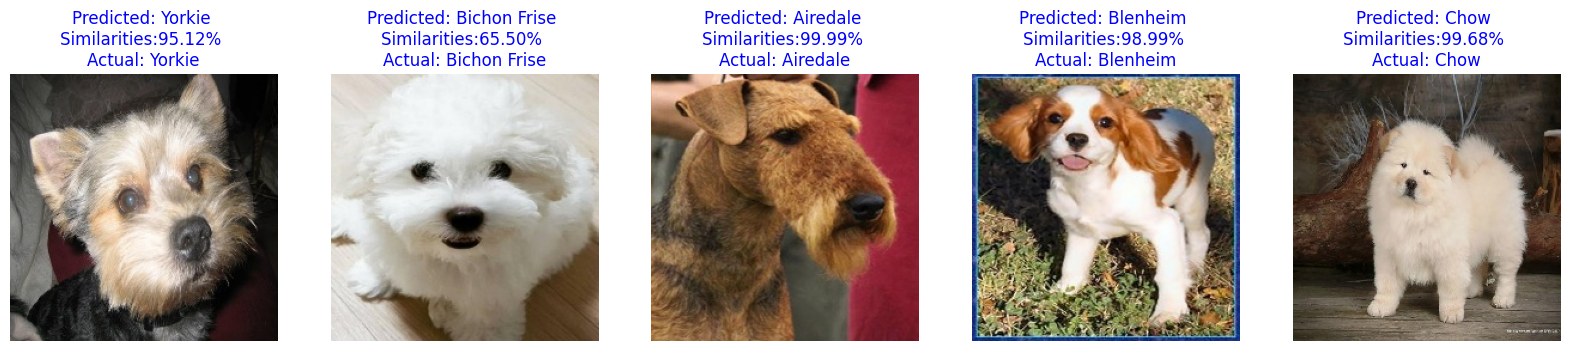

1/1 [==============================] - 0s 139ms/step


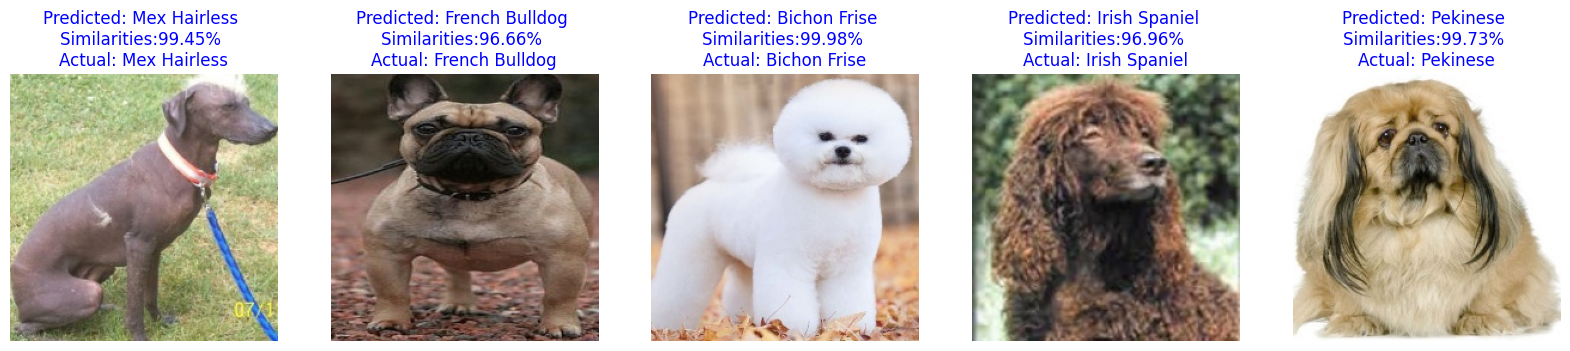

In [9]:
plot_random_images(image_files)

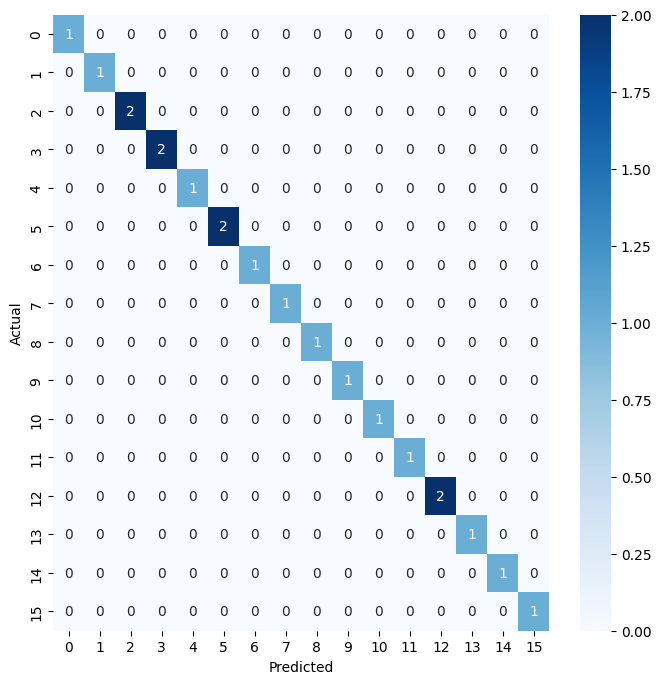

In [10]:
encoder = LabelEncoder()
encoder.fit(breed_names)

actual_breeds_encoded = encoder.transform(actual_breeds)
predicted_breeds_encoded = encoder.transform(predicted_breeds)

cm = confusion_matrix(actual_breeds_encoded, predicted_breeds_encoded)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()